In [1]:
# Imports & Initializations.
%load_ext autoreload
%autoreload 2
import os
import sys
import csv
import json
import time
import pickle
from pathlib import Path
import itertools

sys.path.append(str(Path().absolute().parent.absolute()))

import torch
import yaml
import comet_ml
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from utils.experiment import LocalCometProject, API
from experiment.query_configs import cifar_normal, cifar_il, cifar_normal_numes
from experiment.util import get_metrics, plot_metrics, deal_seeds

check_repeat_ops = {
    "delete_repeat": False,
    "archive_repeat": False,
}

result_path = Path().absolute().parent / "results"
pro_path = Path("/Volumes/DATA/exps/crowdsourcing")
pro = LocalCometProject(pro_path)
archive_repeat = False
cifar_splits = {"il": [10, 20, 50], "olrandom": [10, 50, 100]}
cifar_seeds = {"il": [42], "olrandom": [1, 2, 3, 4, 5]}
cifar_tr_configs = {"il": cifar_il, "olrandom": cifar_normal}


/Users/ei/opt/miniconda/envs/torch/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Check exps.
pro.update_dbs()
task = "il"
splits = cifar_splits[task]
seeds = cifar_seeds[task]
trainer_configs = cifar_tr_configs[task]
check_repeat_ops["archive_repeat"] = False

saving_keys = {split: {} for split in splits}
for (tr, config), split in itertools.product(trainer_configs.items(), splits):
    config["data;split"] = split
    config["task;task"] = task
    config["data;num_batches"] = int(100 / split) if task == "il" else 20

    prefix_info = f"cifar:task{task}-split{split}-{tr}"
    keys, repeated, missing = deal_seeds(pro, config, prefix_info, seeds, check_repeat_ops, True)
    saving_keys[split][tr] = keys
with open(result_path / f"cifar-{task}-keys.yaml", "w") as f:
    yaml.dump(saving_keys, f)

In [ ]:
# Cifar test_batch_acc
pro.update_dbs()
# task = "il"
task = "olrandom"
splits = cifar_splits[task]
seeds = cifar_seeds[task]

with open(result_path / f"cifar-{task}-keys.yaml", "r") as f:
    keys = yaml.safe_load(f)

gen_results = True
if gen_results:
    results = {split: {} for split in splits}
    for split, skey in keys.items():
        for tr, ks in skey.items():
            exps = [pro.get(k) for k in ks]
            results[split][tr] = get_metrics(exps, seeds)
    with open(result_path / f"cifar-{task}-result.yaml", "w") as f:
        yaml.dump(results, f)
else:
    with open(result_path / f"cifar-{task}-result.yaml", "r") as f:
        results = yaml.safe_load(f)

for split, sms in results.items():
    plot_metrics({tr: m["batch"] for tr, m in sms.items()}, f"cifar-{task}-{split}", "step", "acc")


In [3]:
# Check for cifar olrandom.
pro.update_dbs()
task = "olrandom"
check_repeat_ops["archive_repeat"] = False
seeds = [1, 2, 3, 4, 5]
trainer_configs = cifar_normal
splits = cifar_splits["olrandom"]
splits = [10, 50, 100]
# splits = [10]
saving_keys = {split: {} for split in splits}
for (tr, config), split in itertools.product(trainer_configs.items(), splits):
    config["data;split"] = split
    config["task;task"] = task
    config["train;plateau_metric"] = "QUERY v in ['acc', 'train_acc']"

    prefix_info = f"cifar:{task}-split{split}-{tr}"
    keys, repeated, missing = deal_seeds(pro, config, prefix_info, seeds, check_repeat_ops, True)
    saving_keys[split][tr] = keys
with open(result_path / "cifar-olrandom-keys.yaml", "w") as f:
    yaml.dump(saving_keys, f)

tr eeil sp 10
tr eeol sp 10
tr ft sp 10
tr icarl sp 10
tr lucir sp 10
0.2
tr lucir_cwd sp 10
tr lwf sp 10
tr podnet sp 10
tr eeil sp 50
tr eeol sp 50
tr ft sp 50
tr icarl sp 50
tr lucir sp 50
0.2
tr lucir_cwd sp 50
tr lwf sp 50
tr podnet sp 50
tr eeil sp 100
tr eeol sp 100
tr ft sp 100
tr icarl sp 100
tr lucir sp 100
0.2
tr lucir_cwd sp 100
tr lwf sp 100
tr podnet sp 100


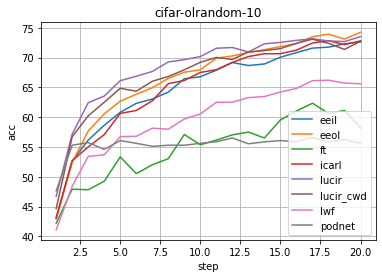

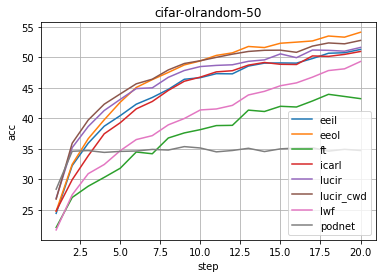

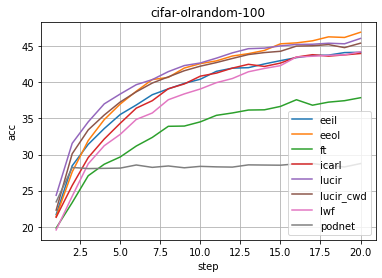

In [4]:
# Cifar olrandom test_batch_acc
pro.update_dbs()
with open(result_path / "cifar-olrandom-keys.yaml", "r") as f:
    keys = yaml.safe_load(f)

splits = cifar_splits["olrandom"]
seeds = [1, 2, 3, 4, 5]
gen_results = True
if gen_results:
    results = {split: {} for split in splits}
    for split, skey in keys.items():
        for tr, ks in skey.items():
            exps = [pro.get(k) for k in ks]
            if tr == "lucir_cwd":
                print(exps[0].configs["train;loss_args;fixed_lambda"])
            print("tr", tr, "sp", split)
            results[split][tr] = get_metrics(exps, seeds, B=20)
    with open(result_path / "cifar-olrandom-result.yaml", "w") as f:
        yaml.dump(results, f)
else:
    with open(result_path / "cifar-olrandom-result.yaml", "r") as f:
        results = yaml.safe_load(f)

for split, sms in results.items():
    plot_metrics({tr: m["batch"] for tr, m in sms.items()}, f"cifar-olrandom-{split}", "step", "acc")


In [ ]:
# Check for cifar num_e.
pro.update_dbs()
check_repeat_ops["archive_repeat"] = False

task = "olrandom"
seeds = [1, 2, 3, 4, 5]

task = "olrandom"
check_repeat_ops["archive_repeat"] = False
seeds = [1, 2, 3, 4, 5]
splits = cifar_splits["olrandom"]
splits = [10]
config = cifar_normal["eeol"]
config["data;split"] = 10
config["log;note"] = "small_dist0.5"
config["task;task"] = "olrandom"
saving_keys = {}

num_es = [x * 10 for x in range(1, 21)]

saving_keys = {}
# for p, smooth, losst, suppress in itertools.product(prompts, smooths, lossts, suppresses):
cnt = 0
for num_e in num_es:
    config["train;plateau_metric"] = lambda v, config: v in ["acc", "train_acc"]
    config["task;num_exemplars_per_class"] = num_e

    prefix_info = f"cifar:{task}-num_e{num_e}"
    keys, repeated, missing = deal_seeds(pro, config, prefix_info, seeds, check_repeat_ops, True)

    if len(missing) == 0:
        saving_keys[num_e] = list(keys)
    else:
        cnt += len(missing)
print(f"Missing {cnt} in total.")
# saving_keys["configs"] = config
with open(result_path / "cifar-olrandom-eeol-num_e-keys.yaml", "w") as f:
    yaml.dump(saving_keys, f)

In [ ]:
# Cifar num_e test_batch_acc
# pro.update_dbs()
with open(result_path / "cifar-olrandom-eeol-num_e-keys.yaml", "r") as f:
    keys = yaml.safe_load(f)

# splits = cifar_splits["olrandom"]
seeds = [1, 2, 3, 4, 5]
gen_results = True
if gen_results:
    results = {}
    for num_e, ks in keys.items():
        exps = [pro.get(k) for k in ks]
        results[num_e] = get_metrics(exps, seeds)
    with open(result_path / "cifar-olrandom-eeol-num_e-result.csv", "w") as f:
        heads = ",".join([f"num_e{num_e}" for num_e in keys.keys()] + [f"num_e{num_e}_fin" for num_e in keys.keys()] + [f"num_e{num_e}_inc" for num_e in keys.keys()]) + "\n"
        f.write(heads)
        for i in range(20):
            tmp = [str(results[num_e]["batch"][i]) for num_e in results]
            if i == 0:
                tmp += [str(results[num_e]["fin"]) for num_e in results]
                tmp += [str(results[num_e]["inc"]) for num_e in results]
            f.write(",".join(tmp) + "\n")
    with open(result_path / "cifar-olrandom-eeol-num_e-result.yaml", "w") as f:
        yaml.dump(results, f)
else:
    with open(result_path / "cifar-olrandom-eeol-num_e-result.yaml", "r") as f:
        results = yaml.safe_load(f)

fins = sorted([[num_e, m["fin"]] for num_e, m in results.items()], key=lambda x: x[0])
incs = sorted([[num_e, m["inc"]] for num_e, m in results.items()], key=lambda x: x[0])

plt.figure()
num_e, fin = zip(*fins)
plt.plot(num_e, fin, label="final")
num_e, inc = zip(*incs)
plt.plot(num_e, inc, label="incremental")
plt.legend()
plt.grid()
plt.show()
